Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

In [0]:
pip install keras

In [0]:
pip install pandas

In [0]:
import keras
import numpy as np

Using TensorFlow backend.


In [0]:

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import matplotlib.pyplot as plt


In [0]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

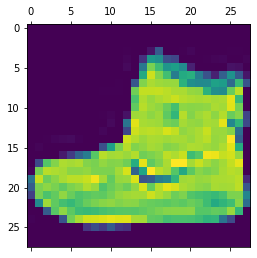

In [0]:
plt.matshow(x_train[0])

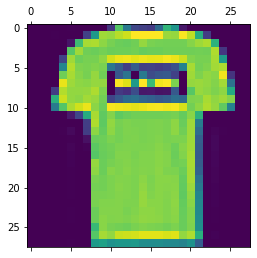

In [0]:
plt.matshow(x_train[1])

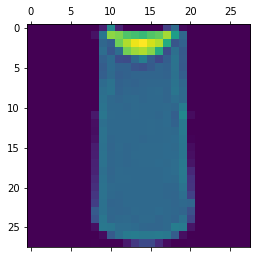

In [0]:
plt.matshow(x_train[2])

In [0]:
y_train[2]

0

In [0]:
y_train[1]

0

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten

In [0]:
model=Sequential()

In [0]:
model.add(Flatten(input_shape=[28,28]))

In [0]:
model.add(Dense(100,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 9s 146us/step - loss: 0.5100 - acc: 0.8204
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3802 - acc: 0.8628
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.3420 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3182 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2993 - acc: 0.8903


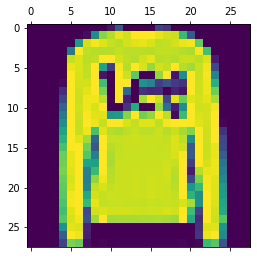

In [0]:
plt.matshow(x_test[1])

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
yp=model.predict(x_test)

In [0]:
yp[1]

array([1.1655391e-04, 1.0249780e-10, 9.9542040e-01, 1.0950160e-09,
       3.8288184e-03, 1.3055657e-12, 6.3421472e-04, 5.7551104e-12,
       4.1563721e-09, 2.1005173e-13], dtype=float32)

In [0]:
np.argmax(yp[1])

2

In [0]:
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('test accuracy:',test_accuracy)

test accuracy: 0.8757
